In [2]:
# Execute this to get wide display
from IPython.display import display, HTML
display(HTML("""<style>#notebook-container{width:100%;margin:20px;padding:20px}</style>"""))

In [3]:
DC_HOME_DIR = "/Users/danielsimig/data_characterization"

from text_characterization.analysis import (
    show_pairwise_metric_correlations,
    PredictFromCharacteristicsAnalysis,
)
from text_characterization.utils import load_text_metrics

In [4]:
import pandas as pd

In [5]:
"""
Read the text characteristics we computed before. To understand what kind of texts this data comes from, here's some context:

In this work we analyze the behavior of a language model (OPT 6.7B baseline) on a multiple choice problem (hellaswag). 
In order for the LM to choose an answer out of 4 options, we score a verablized version of each option with the LM and use the one with the lowest perplexity as the predicted answer.

For each data point, we log two kind of texts:
1) The prompt corresponding to the correct answer (text_key=correct_prompt")
2) The concatenation of all the incorrect promts separated by newline (text_key=incorrect_prompt")

Here is an example of the texts we extracted from the evaluation logs:
"""
import json


cnt = 0
with open(f"{DC_HOME_DIR}/examples/hellaswag_sample_hardness/hellaswag_opt6.7B_fs0_eval.texts.jsonl") as f:
    for line in f:
        line = json.loads(line)
        print("\n\n" + line["correct_prompt"] + "\n")
        print(line["incorrect_prompts"])
        cnt += 1
        if cnt == 3:
            break



Roof shingle removal: A man is sitting on a roof. He starts pulling up roofing on a roof.

Roof shingle removal: A man is sitting on a roof. He is using wrap to wrap a pair of skis.
Roof shingle removal: A man is sitting on a roof. He is ripping level tiles off.
Roof shingle removal: A man is sitting on a roof. He is holding a rubik's cube.


Clean and jerk: A lady walks to a barbell. She bends down and grabs the pole. The lady stands and lifts the weight over her head.

Clean and jerk: A lady walks to a barbell. She bends down and grabs the pole. The lady swings and lands in her arms.
Clean and jerk: A lady walks to a barbell. She bends down and grabs the pole. The lady pulls the barbell forward.
Clean and jerk: A lady walks to a barbell. She bends down and grabs the pole. The lady pulls a rope attached to the barbell.


Canoeing: Two women in a child are shown in a canoe while a man pulls the canoe while standing in the water, with other individuals visible in the background. The c

In [6]:
"""
We computed characterisics for these texts using the default metric config.
"""
metrics_df = load_text_metrics(f"{DC_HOME_DIR}/examples/hellaswag_sample_hardness/hellaswag_prompt_characteristics.tsv")
metrics_df

Dropping column DESPLd! It contains 50.00% (>20.00%) NaN values!


,DESPC,DESSC,DESWC,DESPL,DESPLw,DESSL,DESSLd,DESWLsy,DESWLsyd,DESWLlt,...,WORD_PROPERTY_WRDPOLc,WORD_PROPERTY_WRDHYPn,WORD_PROPERTY_WRDHYPv,WORD_PROPERTY_WRDHYPnv,WORD_PROPERTY_AOA,WORD_PROPERTY_AOA_MAX,WORD_PROPERTY_CONCRETENESS,WORD_PROPERTY_PREVALENCE,WORD_PROPERTY_PREVALENCE_MIN,text_key
id,,,,,,,,,,,,,,,,,,,,,
0,1.0,2.0,18.0,2.000000,18.000000,9.000000,1.414214,1.222222,0.427793,3.833333,...,9.300000,7.000000,0.333333,5.000000,4.601667,4.601667,3.461667,2.211778,2.211778,correct_prompt
0,3.0,6.0,55.0,2.000000,17.666667,9.166667,2.136976,1.254545,0.439620,3.509091,...,8.275862,6.789474,0.571429,5.115385,4.834694,4.834694,3.187959,2.200245,2.200245,incorrect_prompts
1,1.0,3.0,26.0,3.000000,26.000000,8.666667,1.527525,1.115385,0.325813,3.846154,...,16.307692,6.571429,1.600000,4.500000,4.783077,4.783077,3.011923,2.295385,2.295385,correct_prompt
1,3.0,10.0,73.0,3.333333,23.666667,7.300000,1.766981,1.178082,0.385230,3.767123,...,11.486486,7.050000,1.461538,4.848485,4.893944,4.893944,3.032254,2.225324,2.225324,incorrect_prompts
2,1.0,2.0,43.0,2.000000,43.000000,21.500000,10.606602,1.441860,0.825265,4.186047,...,8.000000,6.500000,1.600000,5.058824,4.820930,4.820930,3.027907,2.291930,2.291930,correct_prompt
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10039,3.0,19.0,214.0,6.333333,70.666667,11.263158,5.258243,1.359813,0.617789,4.289720,...,9.465649,6.841270,0.774194,4.840426,5.598400,5.598400,2.944800,2.319075,2.319075,incorrect_prompts
10040,1.0,6.0,67.0,6.000000,67.000000,11.166667,4.956477,1.447761,0.702454,4.626866,...,8.512821,7.000000,1.500000,5.225806,5.561270,5.561270,2.674219,2.264375,2.264375,correct_prompt
10040,3.0,18.0,210.0,6.000000,69.333333,11.666667,4.946776,1.414286,0.695017,4.366667,...,9.830508,6.864407,1.137931,4.977273,5.363918,5.363918,2.676224,2.268584,2.268584,incorrect_prompts


In [9]:
"""
This is a simple file that we prepared that contains the outcome of evluating the 6.7B OPT baseline on the HellaSwag dataset.
Every line only contains two fields only: the ID of the data point and whether the model chose the correct answer.
"""

outcomes_df = pd.read_json(
    f"{DC_HOME_DIR}/examples/hellaswag_sample_hardness/hellaswag_opt6.7B_fs0_eval.outcomes.jsonl",
    lines=True,
    orient="records"
).set_index("id")
outcomes_df = outcomes_df.rename(columns={"outcome": "Model Accuracy"})
outcomes_df

,Model Accuracy
id,
0,False
1,True
2,True
3,False
4,True
...,...
10037,True
10038,True
10039,False


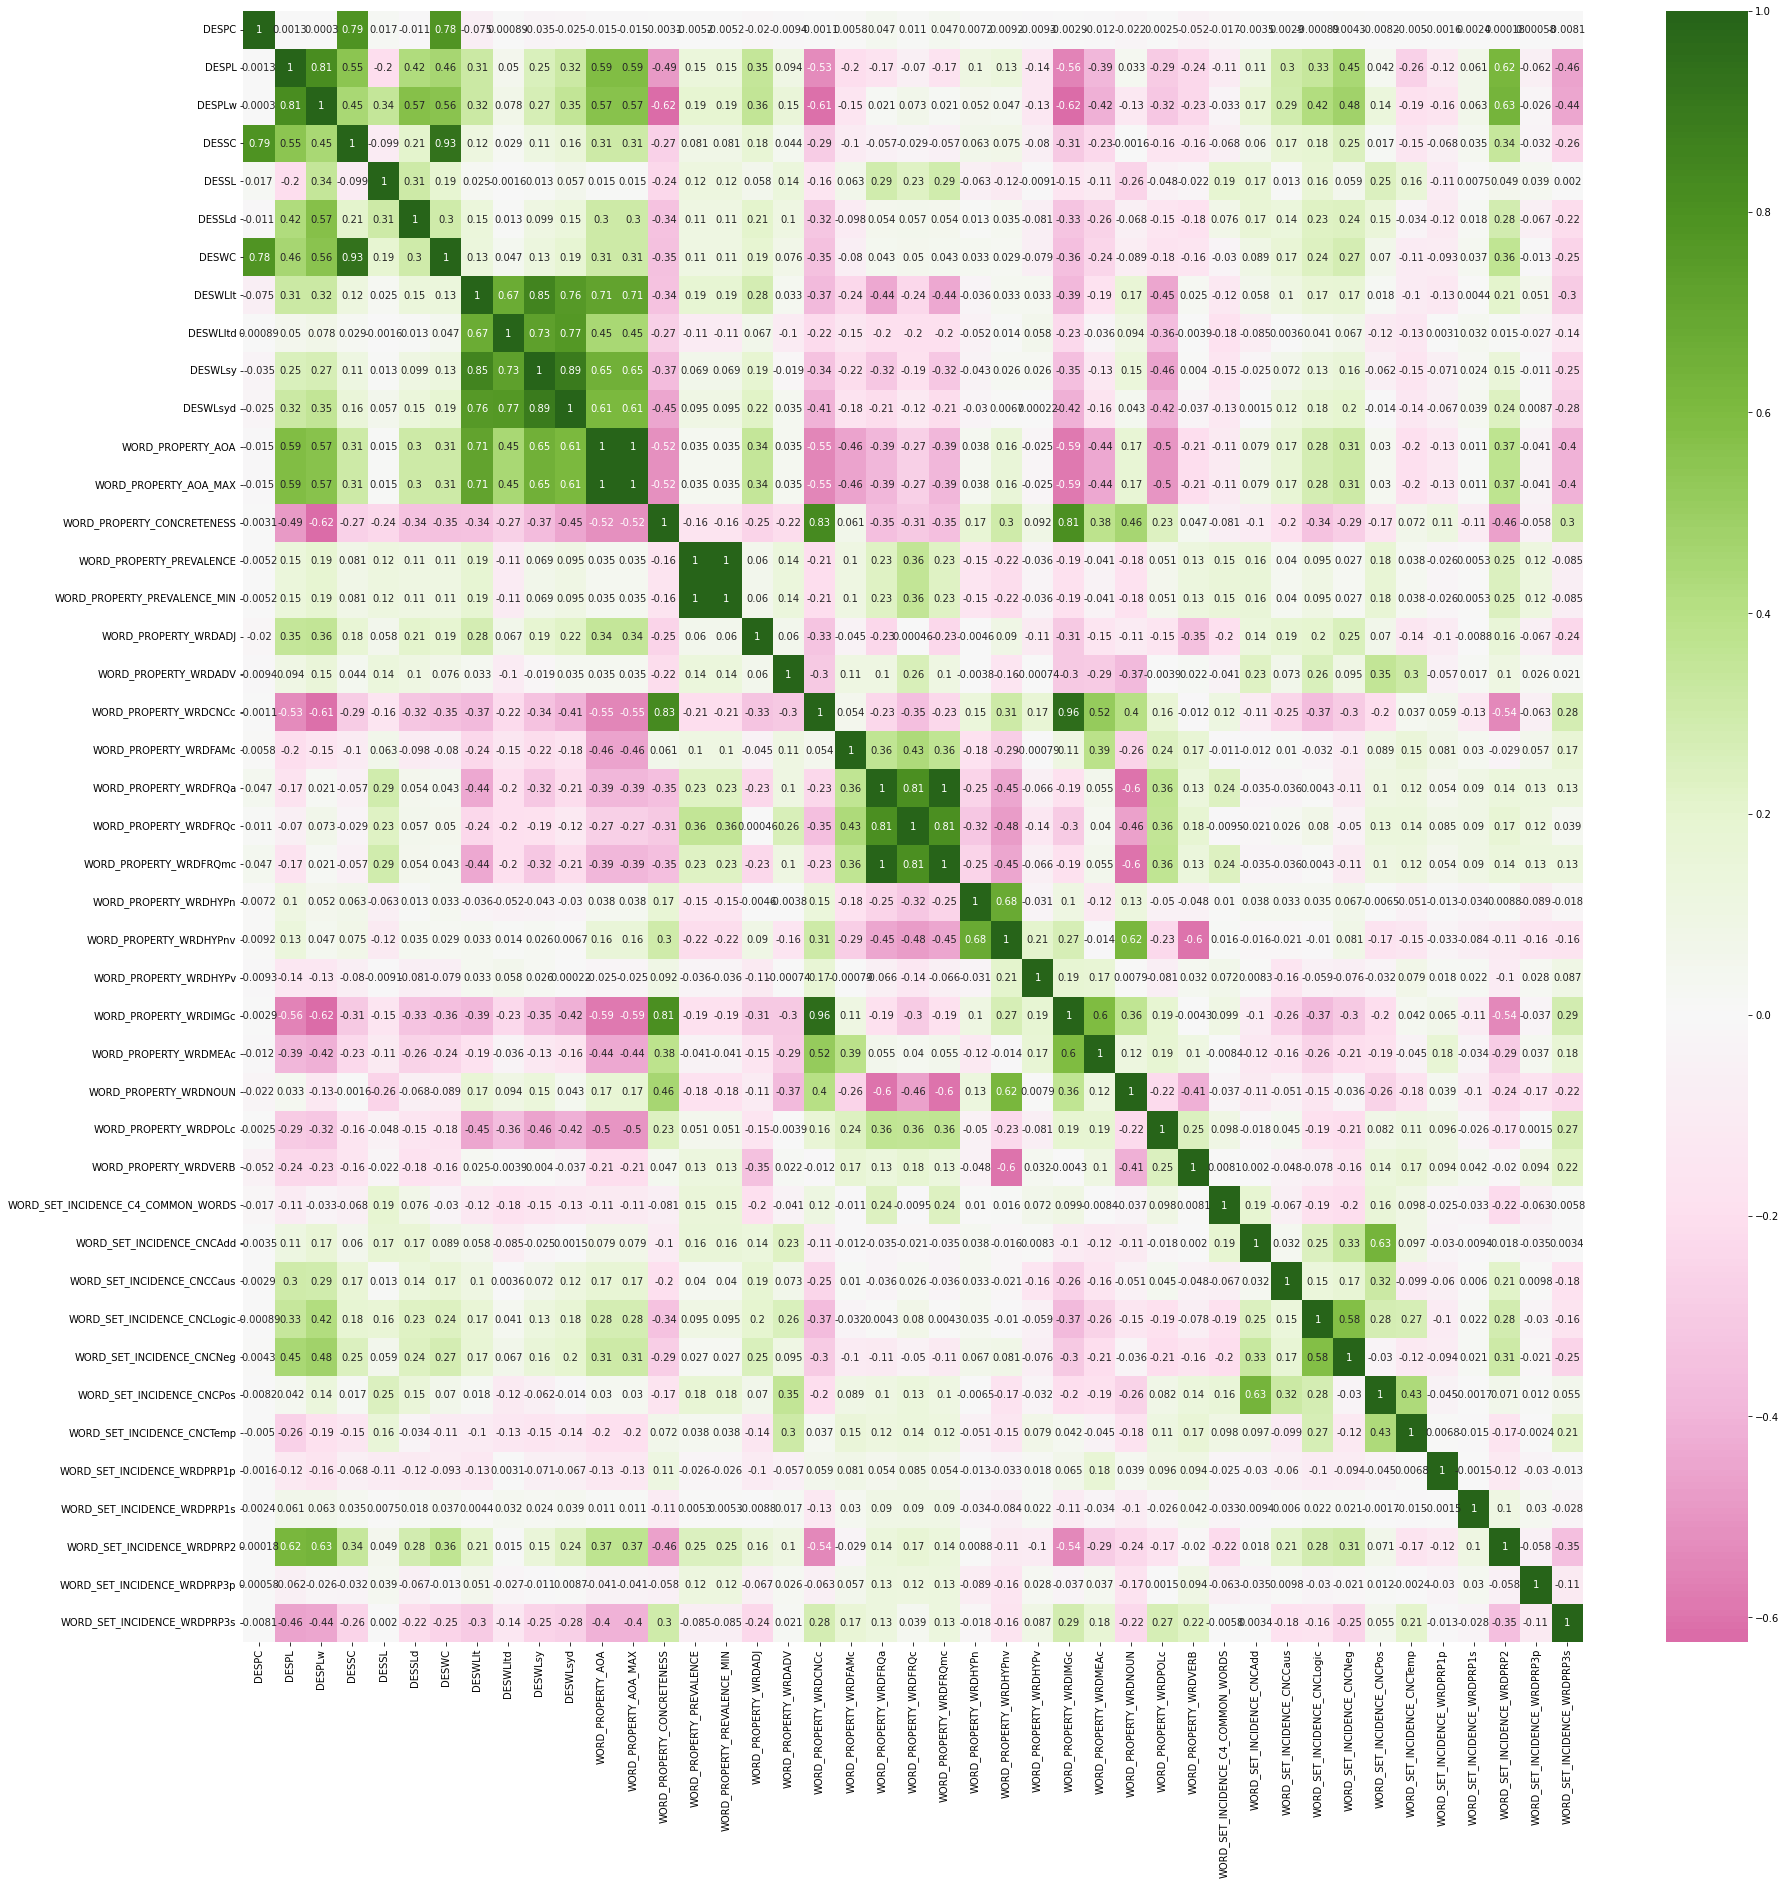

In [10]:
# Plot correlations between different metrics on this dataset. Being aware of highly correlated characteristics is useful context for interpreting the results of any downstream analysis.

show_pairwise_metric_correlations(metrics_df)

In [11]:
"""
Load the characteristics and the outcomes into our analysis tool. We will use the default logistic regression for predicting model performance.
"""

predictive_analysis = PredictFromCharacteristicsAnalysis(
    metrics_df,
    outcomes_df,
    model_type="logistic_regression"
)

Analysis initialized! There are:
 86 features available
 7531 samples for fitting a predictive model
 2511 to evaluate the fit.


In [12]:
"""
First, let's take a look at how model accuracy looks like across segments of our data if we sort it data by various individial data characteristics.

"""

predictive_analysis.show_individual_metric_correlations(
    data_points_per_bucket=1000,
    figsize=(15, 15),
    fontsize=25,
    savefig_path="/Users/danielsimig/Documents/individual_correlations.png"
)

/Users/danielsimig/.local/lib/python3.8/site-packages/scipy/stats/_stats_py.py:4424: ConstantInputWarning: An input array is constant; the correlation coefficient is not defined.
  warnings.warn(stats.ConstantInputWarning(msg))
/Users/danielsimig/data_characterization/text_characterization/analysis.py:131: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


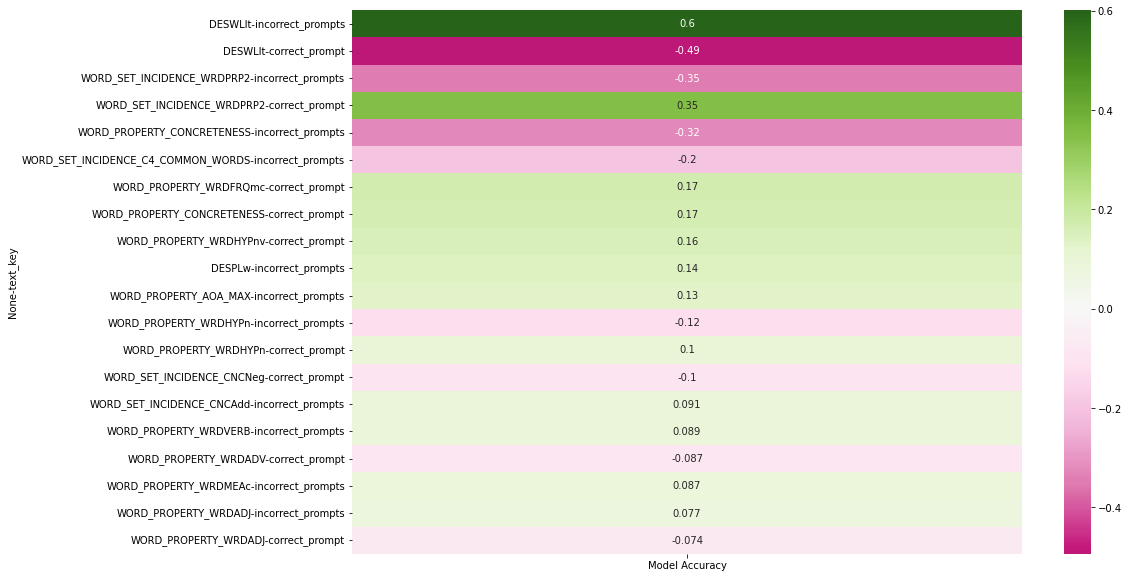

In [13]:
"""
Fit a regression model to predict model performance based on all data characteristics and show resulting coefficients.
Since this model type scales input features before regression, the resulting coefficients can be directly compared, with the caveat that some features simply have low coverage and thus their overall impact can still be low.


As expected, features with high coefficients are the ones that show strong correlation with model correctness. What is interesting, though, is that the regression often assigns coefficients of opposite signs
to the correct / incorrect answer versions of very same metric. This means that it is not only the absolute value of the metric that matters but also the difference between the correct and incorrect answers - that might help the model to "cheat".
"""

predictive_analysis.fit_predictive_models()
predictive_analysis.show_coefficients(num_rows=20, savefig_path="/Users/danielsimig/Documents/coeffs.png", figsize=(15, 10))

/Users/danielsimig/data_characterization/text_characterization/analysis.py:131: UserWarning: Matplotlib is currently using module://matplotlib_inline.backend_inline, which is a non-GUI backend, so cannot show the figure.
  fig.show()


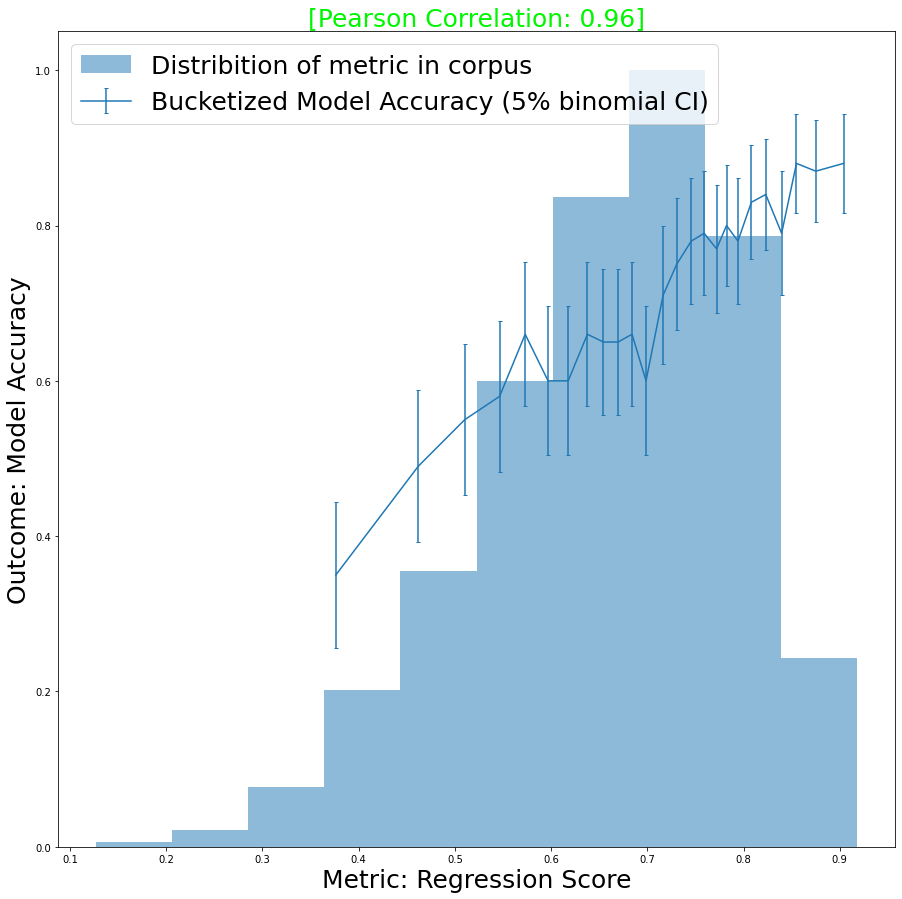

In [14]:
"""
In this diagram, we sort (held out) data points by the score assigned by the regression model and compute bucketized model accuracy per bucket (dark blue line).
We also plot the distribution of the regression score to give an idea of how large parts of the dataset are assigned to certain ranges of score (blue bars in background).

In this instance, we find that there are significant variations between the left and the right tail of the distribtuion. Using a few simple characteristics of the text we can identify
large subesets of the held out data where our OPT language model will perform with < 0.5 accuracy as well as subsets where the accuracy is > 0.8. This is a stronger result than any of the individual metrics could show.
"""
predictive_analysis.plot_predictictions(
    data_points_per_bucket=100,
    figsize=(15, 15),
    fontsize=25,
    savefig_path="/Users/danielsimig/Documents/regression_results.pdf")